<a href="https://colab.research.google.com/github/Daniellien2018/Project_5_Bank_Churn_Prediction/blob/main/INN_Learner_Notebook_Full_code_Daniel_Lien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks: Bank Churn prediction - Daniel Lien

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
#data manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#library to split data
from sklearn.model_selection import train_test_split

# Library to encode the variables
from sklearn import preprocessing

#To Scale the Data
from sklearn.preprocessing import StandardScaler

#To import different metrics
from sklearn import metrics
from tensorflow.keras import backend

# To plot confusion matrix
from sklearn.metrics import confusion_matrix

#for seed randomization
import random

#for model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

!pip install scikeras[tensorflow]
from scikeras.wrappers import KerasClassifier
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# #Importing classback API
from keras import callbacks
# # importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# # importing GridSearch CV
from sklearn.model_selection import GridSearchCV

# # importing SMOTE
from imblearn.over_sampling import SMOTE

# #Importing classback API
from keras import callbacks

import warnings
warnings.filterwarnings("ignore")


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
path='/content/drive/My Drive/UT Austin AIML/Datasets/Churn.csv'
bank_data = pd.read_csv(path)
data = bank_data.copy()
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Overview

In [ ]:
#check first 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#check last 5 rows
data.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
#check shape of data
data.shape

(10000, 14)

In [ ]:
#check the info on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#statistical summary of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
#check for missing data
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#check number of unique values for each column
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
#customerIDs, surnames, and row numbers are all unique to customer, do not need, will drop
data = data.drop(['RowNumber', 'CustomerId','Surname'],axis=1)
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

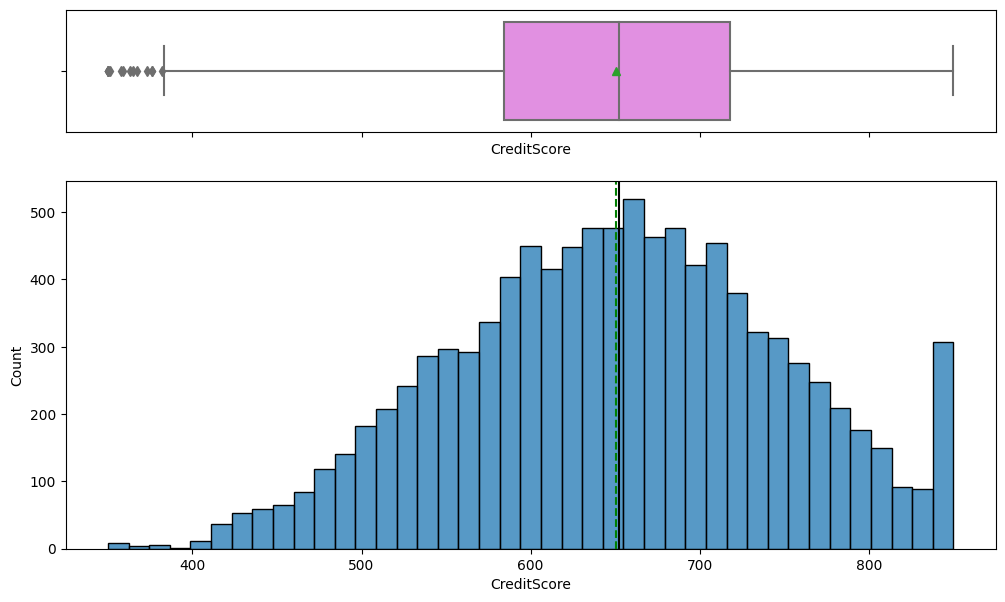

In [ ]:
#Observations on CreditScore
histogram_boxplot(data, 'CreditScore')



*   Credit Score is sligtly skewed left with median around 650
*   Uniquely large spike of scores around 850



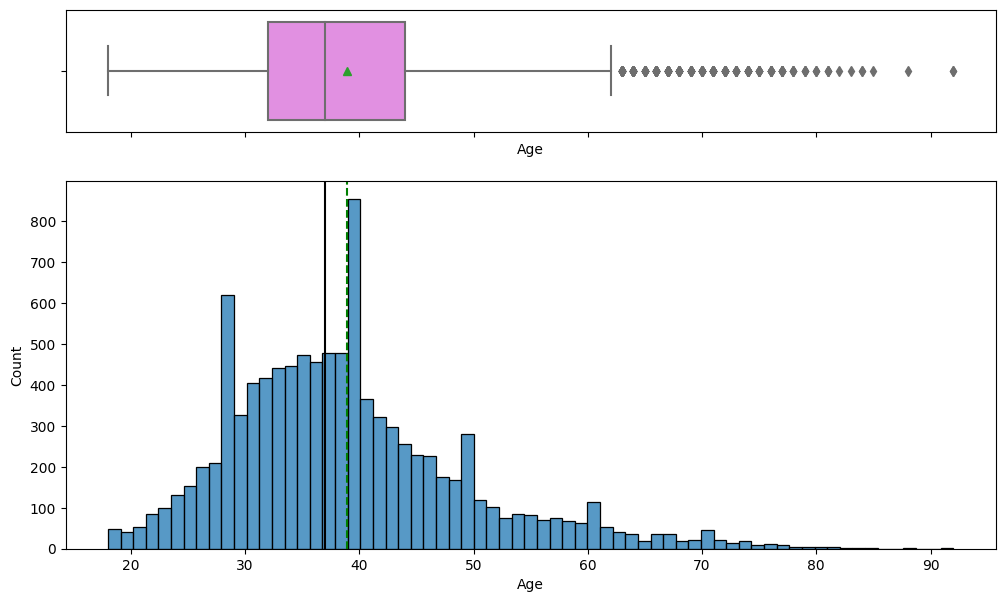

In [ ]:
#Observations on Age
histogram_boxplot(data, 'Age')



*   Age is skewed right with a median age around 37
*   Most common age is 40




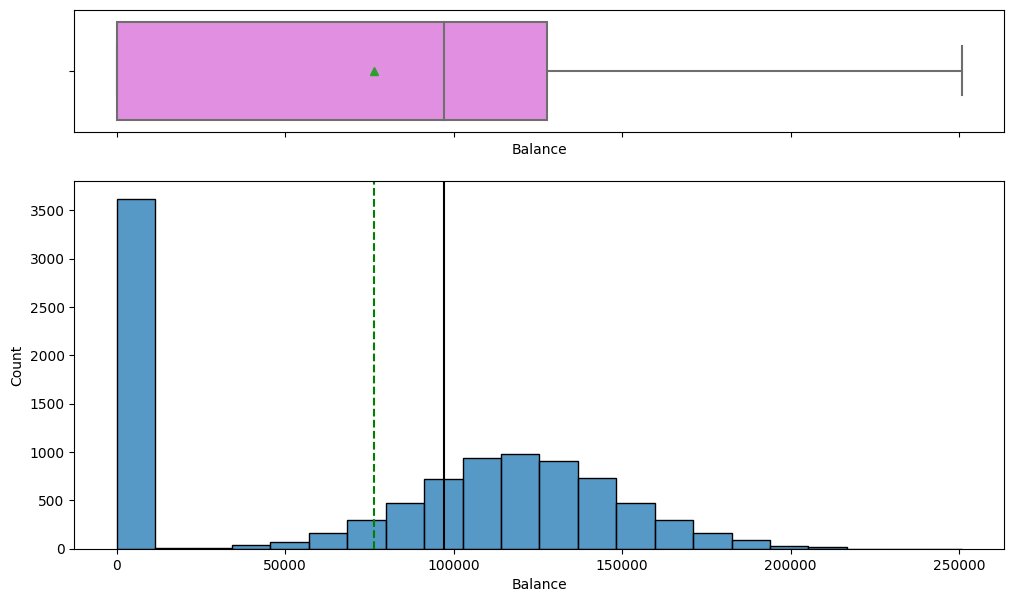

In [ ]:
#Observations on Balance
histogram_boxplot(data, 'Balance')



*   Balance has a strong mode of 0, dragging the median down



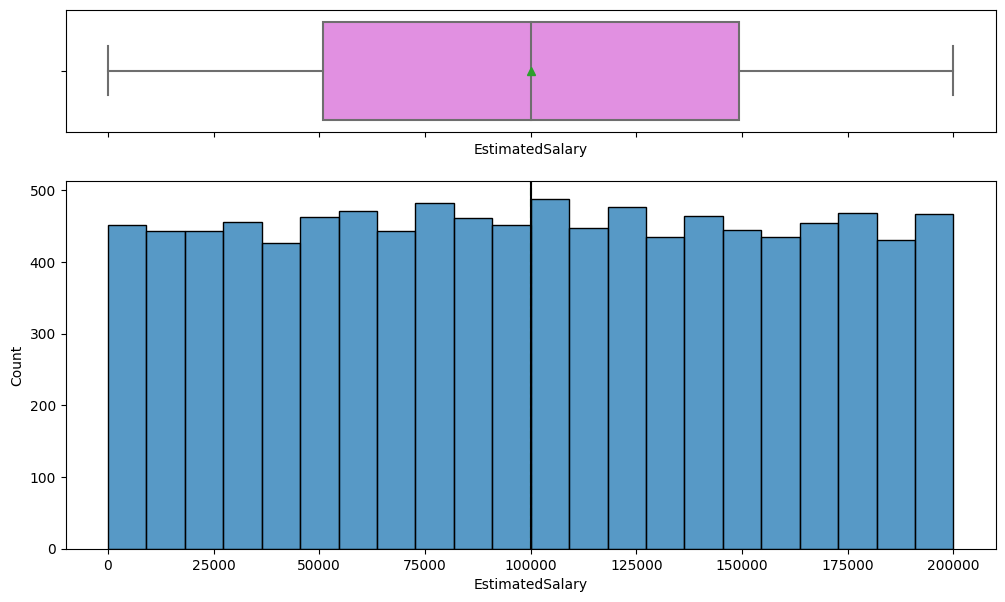

In [ ]:
#Observations on EstimatedSalary
histogram_boxplot(data, 'EstimatedSalary')



*   Estimated salary is fairly well distributed

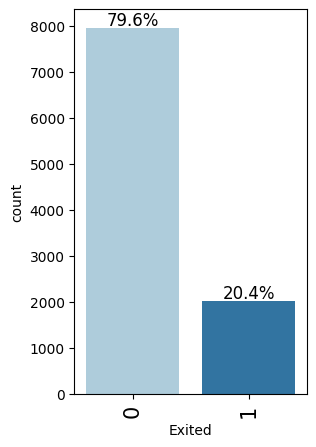

In [ ]:
#Observations on Exited
labeled_barplot(data, "Exited", perc=True)



*   A majority of customers have left the bank within the last 6 months



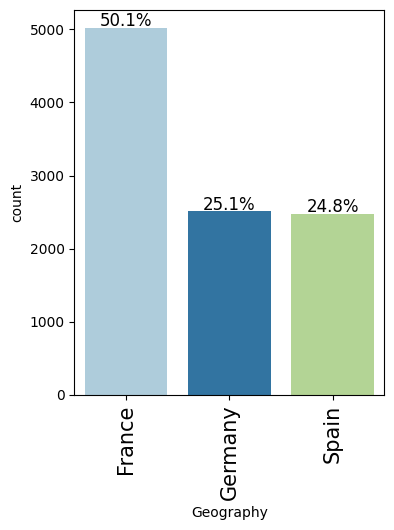

In [ ]:
#Observations on Geography
labeled_barplot(data, 'Geography', perc=True)



*   France occupies the majority of the population
*   The rest are evenly split between Germany and Spain



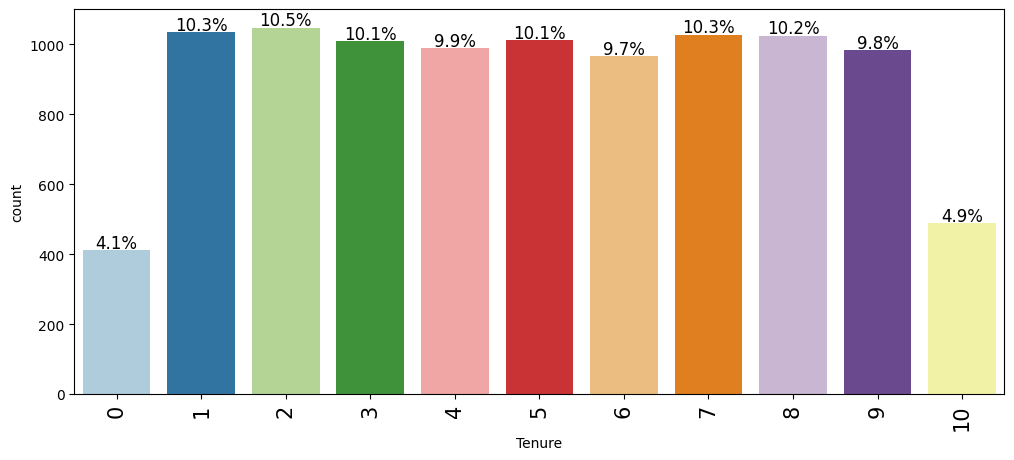

In [ ]:
#Observations on Tenure
labeled_barplot(data, 'Tenure', perc=True)



*   Distribution is fairly evenly split
*   There is a drop off at both ends, 0 and 10 years of tenure



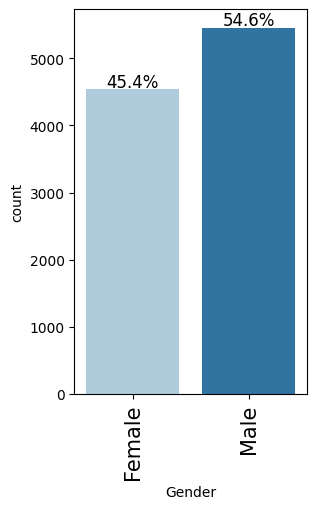

In [ ]:
#Observations on Gender
labeled_barplot(data, 'Gender', perc=True)



*   Gender distributions are fairly equal, with a slight increase in males



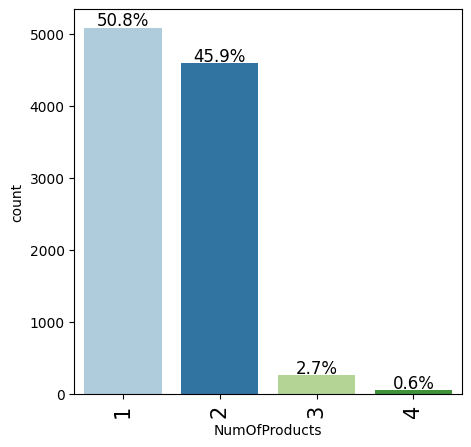

In [ ]:
#Observations on NumOfProducts
labeled_barplot(data, 'NumOfProducts', perc=True)



*   Most customers have purchased either 1 or 2 products from bank
*   Only a select few have more than 2



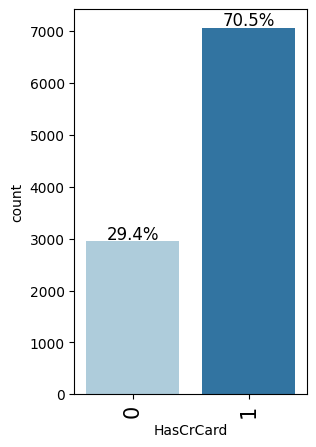

In [ ]:
#Observations on HasCrCard
labeled_barplot(data, 'HasCrCard', perc=True)



*   Around 75% of customers have a credit card, this is the majority.



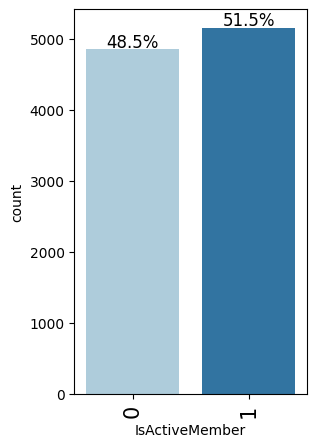

In [ ]:
#Observations on IsActiveMember
labeled_barplot(data, 'IsActiveMember', perc=True)



*   Slightly more than half of customers are active members.


### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

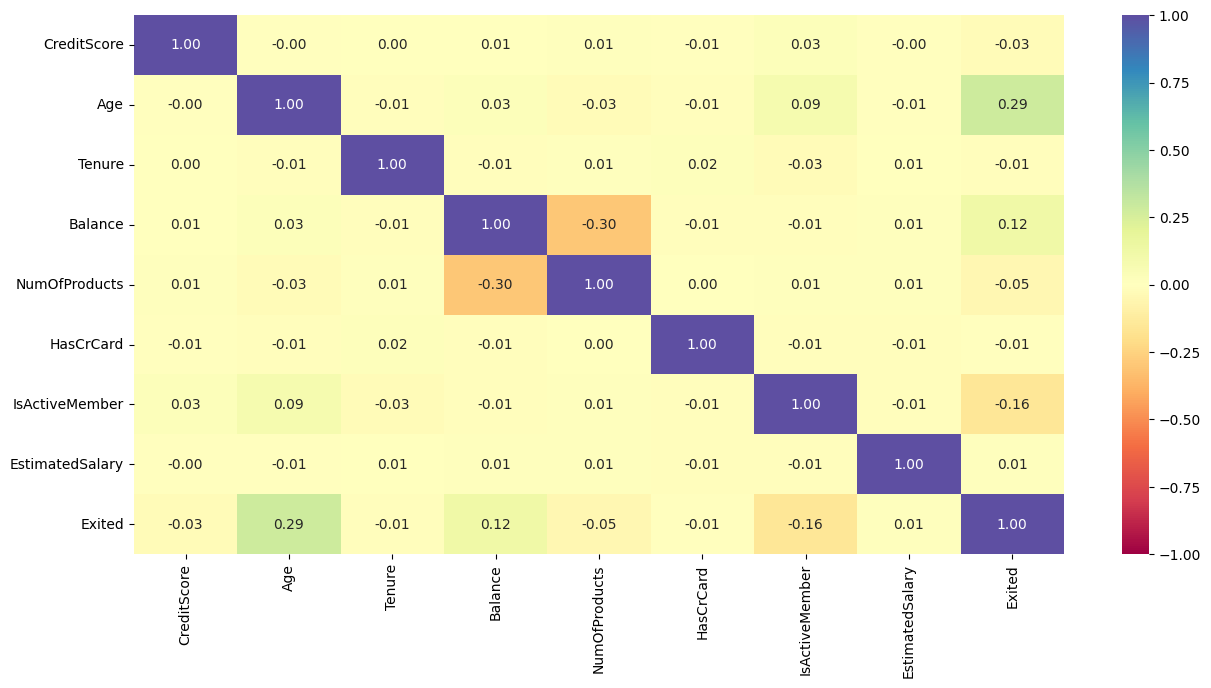

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()



*   Age and Exited seem to have the strongest correlation
*   Age and Balance also seem to have a strong coreralation




Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


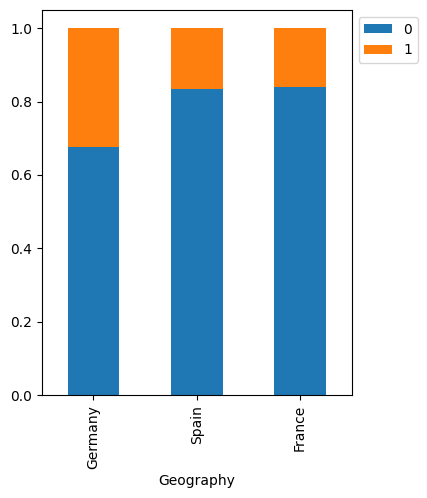

In [ ]:
#Exited vs Geography
stacked_barplot(data, "Geography", "Exited" )



*   Germany has the most number of exited customers
*   Germany has the highest percentage of exited customers



Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


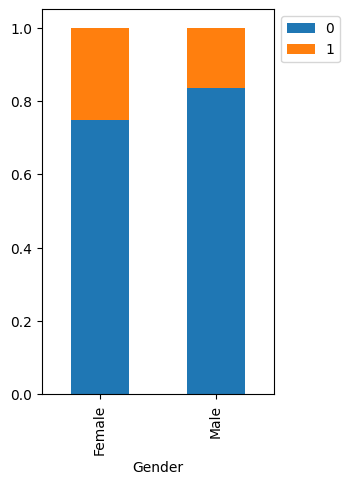

In [ ]:
#Exited vs Gender
stacked_barplot(data, "Gender", "Exited" )



*   There are more female exited customers than male

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


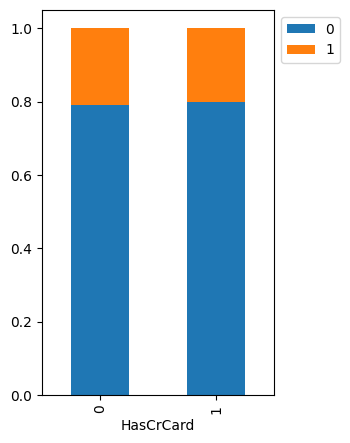

In [ ]:
#Exited vs HasCreditCard
stacked_barplot(data, "HasCrCard", "Exited" )



*   The percentage of exited customers who have a card and do not are roughly the same, althought there are twice as many who do have a card and have exited.



Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


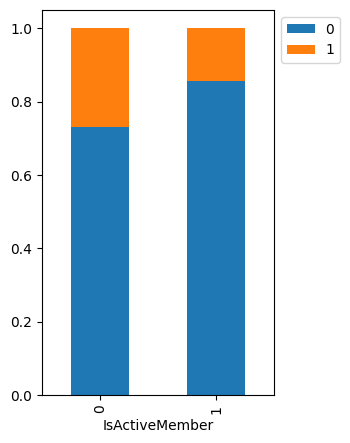

In [ ]:
#Exited vs Active Member
stacked_barplot(data, "IsActiveMember", "Exited" )



*   There are more exited customers who are no longer active members.


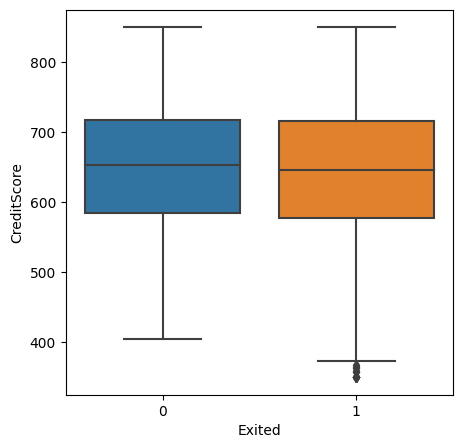

In [ ]:
#Exited vs Credit Score
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=data)
plt.show()



*   Credit score for exited and non-exited customers are roughly the same



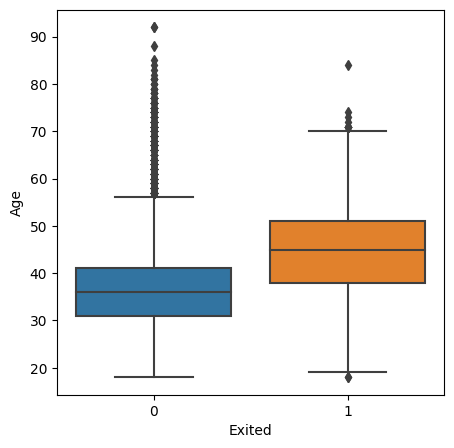

In [ ]:
#Exited vs Age
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=data)
plt.show()



*   Age of exited customers are generally higher than non-exited customers
*   Seems to be around the age of 45 that customers tend to exit







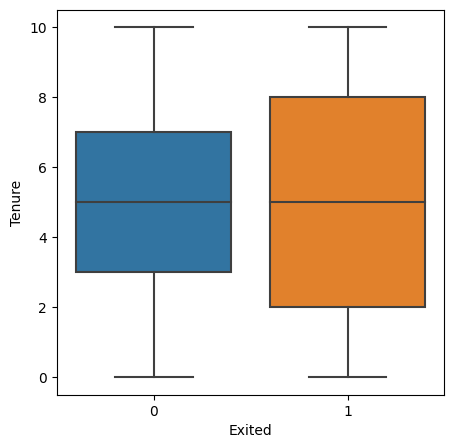

In [ ]:
#Exited vs Tenure
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=data)
plt.show()



*   Average tenure for both exited and non-exited is 5 years.
*   Larger range of tenure for exited customers.



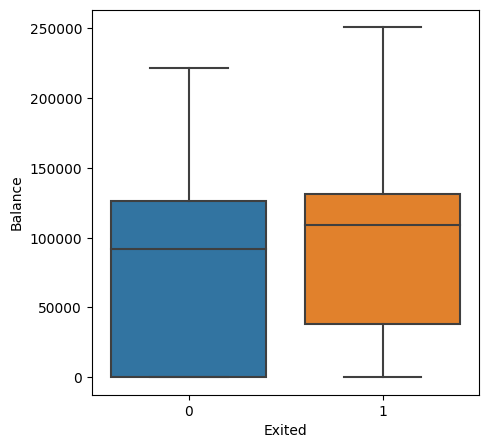

In [ ]:
#Exited vs Balance
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=data)
plt.show()



*   Median balance of exited customers are slightly higher than non-exited
*   Lowerbound of non-exited customers are at 0, customers will not typically exit with a balance of 0.



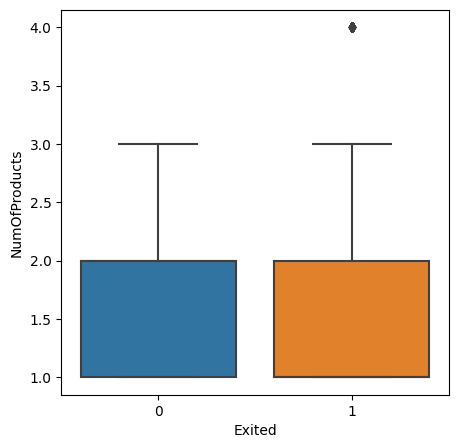

In [ ]:
#Exited vs Num of Products
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=data)
plt.show()



*   NumOfProducts are generally the same forb oth exited and non-exited customers.



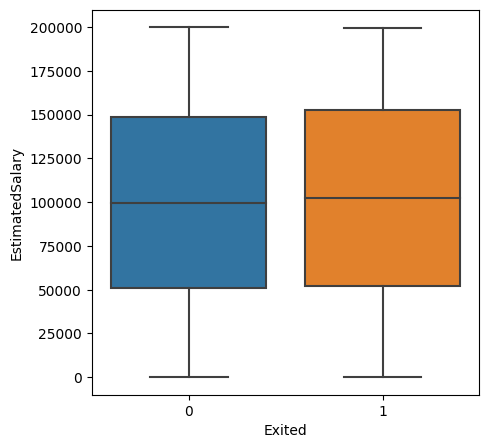

In [ ]:
#Exited vs Estimated Salary
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=data)
plt.show()


*   Estimated salary for non-exited and exited customers are nearly identical.





1.   The distribution of credit scores are slightly skewed left, with many outliers near the 850 end.
2.   There are 5150 customers that are active out of 10000
3. Only two different customer attributed correalted to each other, Age vs Exited and Balance vs Exited
4. Females appear to churn more when compared to males
5. Customers from Germany are churning the most, while customers from France are churning the least.


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
#double check that there is no missing data
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#All coulumns are correct, no need to feature engineering

In [ ]:
#prepare non-categorical data for outlier test
non_cat_data = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
non_cat_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,619,42,2,0.00,1,101348.88
1,608,41,1,83807.86,1,112542.58
2,502,42,8,159660.80,3,113931.57
3,699,39,1,0.00,2,93826.63
4,850,43,2,125510.82,1,79084.10


In [ ]:
#set threshold, find all outliers using z-scores
#make dataframe of all int data, check ignore categorical

threshold = 3
outlier = {}
for col in non_cat_data.columns:
    i = data[col]
    mean = np.mean(data[col])
    std = np.std(data[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 CreditScore : []

 Age : [71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 71, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 72, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 75, 75, 75, 75, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 78, 78, 78, 78, 78, 79, 79, 79, 79, 80, 80, 80, 81, 81, 81, 81, 82, 83, 84, 84, 85, 88, 92, 92]

 Tenure : []

 Balance : []

 NumOfProducts : [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

 EstimatedSalary : []


In [ ]:
#Drop independent variable from rest of dependent variables, stored in X
#Store independent variable in y
X = data.drop(['Exited'],axis=1)
y = data[['Exited']]

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)

In [ ]:
# Splitting the dataset into the Training and Validation set.

X_train, X_val, y_train, y_val = train_test_split(X_large,y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)

In [ ]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["Geography","Gender"],drop_first=True) ## Complete the code to encode Geography and Gender in train set
X_test = pd.get_dummies(X_test, columns=["Geography","Gender"],drop_first=True)   ## Complete the code to encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["Geography","Gender"],drop_first=True)     ## Complete the code to encode Geography and Gender in validation set

In [ ]:
## Complete the below code to scale the data using standardscaler
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])

## Model Building

### Model Evaluation Criterion

* Need to determine if a customer will exit or not. 4 cases for model prediction


1.   A customer that exits is predicted to exit (True Positive
2.   A customer exits but is not predicted to exit (False Negative)
3.   A customer does not exit but is predicted to exit (False Positive)
4.   A customer does not exit that is not predicted to exit (True Negetive)



*   Most important case will be predicting a customer is not leaving but
Customer actually does (False Negative)
*   This should be minimized as this would be most costly.
*   Recall should be Maximized








In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

### Model Building: Neural Network

In [ ]:
#set up and ensure reproducibility in env
#clear keras session
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42) #42 is norm for ML
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#build first model
def create_model_v1(input_dimen=11, layer_1=32):
    # Initializing the ANN
    classifier = Sequential()
    # Add the input layer with 64 neurons with relu as activation function with input of 11 variables
    classifier.add(Dense(activation = 'relu', input_dim = input_dimen, units=64))

    # Add the 1st hidden layer with 32 neurons
    classifier.add(Dense(layer_1, activation='relu'))

    #Output we want is 1 (whether customer exits or does not exit)
    #thus, we will use sigmoid
    classifier.add(Dense(1, activation = 'sigmoid'))

    #compile model with SGD optimizers and binary_crossentropy. metric is accuracy
    classifier.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

    return classifier



In [ ]:
classifier = create_model_v1()
## obtain the summary of the model
classifier.summary()

hello
test
test1
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                768       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## fit the model on train data for 100 epochs
history=classifier.fit(X_train, y_train,
          validation_data=(X_val,y_val),
          epochs=100,
          batch_size=32)

Epoch 1/100
319/319 [==============================] - 1s 2ms/step - loss: 0.6520 - accuracy: 0.6289 - val_loss: 0.5837 - val_accuracy: 0.7212
Epoch 2/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5923 - accuracy: 0.7129 - val_loss: 0.5484 - val_accuracy: 0.7356
Epoch 3/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5620 - accuracy: 0.7355 - val_loss: 0.5662 - val_accuracy: 0.7094
Epoch 4/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7401 - val_loss: 0.5399 - val_accuracy: 0.7200
Epoch 5/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5347 - accuracy: 0.7397 - val_loss: 0.5287 - val_accuracy: 0.7300
Epoch 6/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5265 - accuracy: 0.7446 - val_loss: 0.5527 - val_accuracy: 0.7000
Epoch 7/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5197 - accuracy: 0.7462 - val_loss: 0.5190 - val_accuracy: 0.7281

63/63 [==============================] - 0s 3ms/step - loss: 0.4230 - accuracy: 0.8035


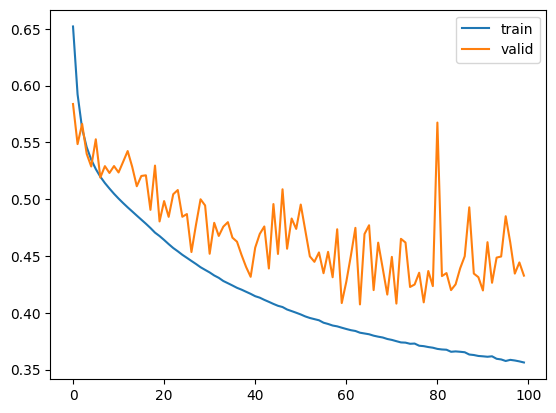

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

results = classifier.evaluate(X_test, y_test)

50/50 [==============================] - 0s 887us/step


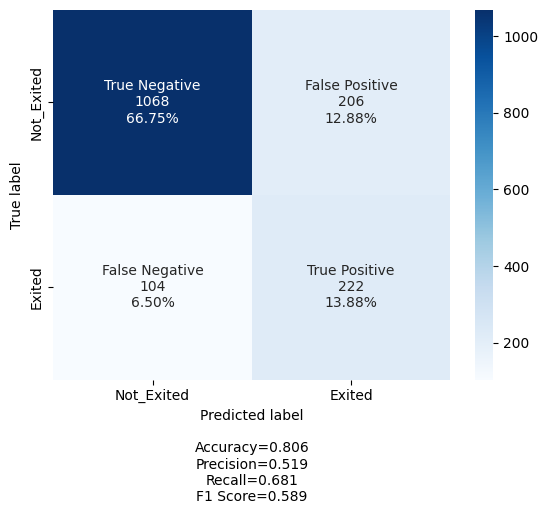

In [ ]:
## obtain the prediction on X_val and obtain the confusion matrix
y_pred1=classifier.predict(X_val)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v2(layer_1=64, layer_2=32, opti=0.001):
      ## Initializing the neural network
      model = Sequential()

      ##add the input layer with 64 neurons and relu as activation function
      model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

      ## add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(layer_2,activation='relu'))

      ## add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = 'sigmoid'))

      ## initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers.Adam(opti)

      ## compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
model_2=create_model_v2()
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## fit the model on train data
history = model_2.fit(X_train,y_train,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
319/319 [==============================] - 2s 2ms/step - loss: 0.5601 - accuracy: 0.7147 - val_loss: 0.5385 - val_accuracy: 0.7113
Epoch 2/100
319/319 [==============================] - 1s 4ms/step - loss: 0.5084 - accuracy: 0.7515 - val_loss: 0.5316 - val_accuracy: 0.7262
Epoch 3/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4825 - accuracy: 0.7713 - val_loss: 0.5087 - val_accuracy: 0.7462
Epoch 4/100
319/319 [==============================] - 1s 4ms/step - loss: 0.4603 - accuracy: 0.7841 - val_loss: 0.4676 - val_accuracy: 0.7731
Epoch 5/100
319/319 [==============================] - 1s 3ms/step - loss: 0.4441 - accuracy: 0.7931 - val_loss: 0.4638 - val_accuracy: 0.7744
Epoch 6/100
319/319 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.8003 - val_loss: 0.5370 - val_accuracy: 0.7244
Epoch 7/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.8060 - val_loss: 0.4802 - val_accuracy: 0.7625

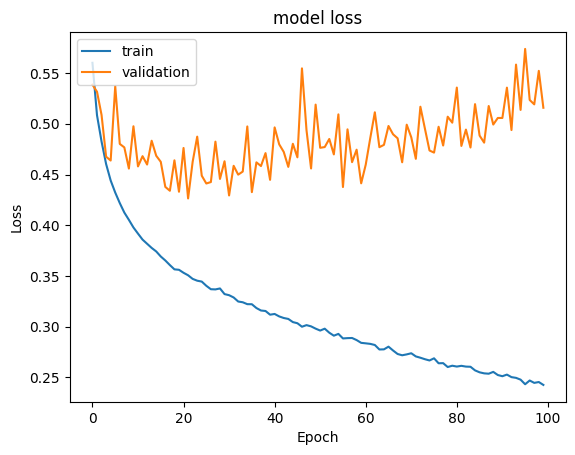

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Importing classback API
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## call the create_model() function
model_v2_e=create_model_v2()

## train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_v2_e.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.7272 - val_loss: 0.5356 - val_accuracy: 0.7269
Epoch 2/100
319/319 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7662 - val_loss: 0.5190 - val_accuracy: 0.7462
Epoch 3/100
319/319 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.7834 - val_loss: 0.4903 - val_accuracy: 0.7681
Epoch 4/100
319/319 [==============================] - 0s 1ms/step - loss: 0.4446 - accuracy: 0.7950 - val_loss: 0.4508 - val_accuracy: 0.7912
Epoch 5/100
319/319 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8046 - val_loss: 0.4461 - val_accuracy: 0.7925
Epoch 6/100
319/319 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8108 - val_loss: 0.5154 - val_accuracy: 0.7525
Epoch 7/100
319/319 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.8166 - val_loss: 0.4685 - val_accuracy: 0.7825

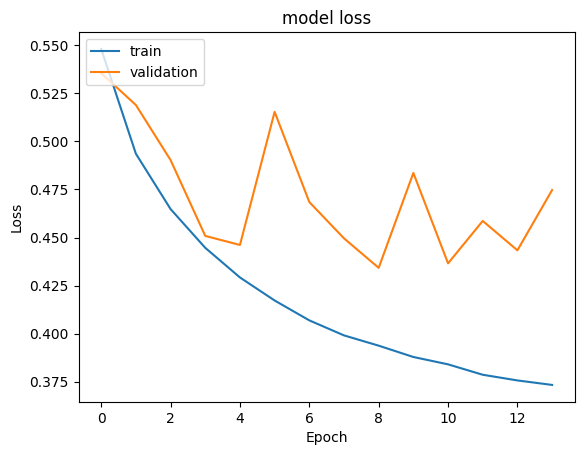

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

319/319 [==============================] - 0s 910us/step
Best Threshold=0.585864, G-Mean=0.841


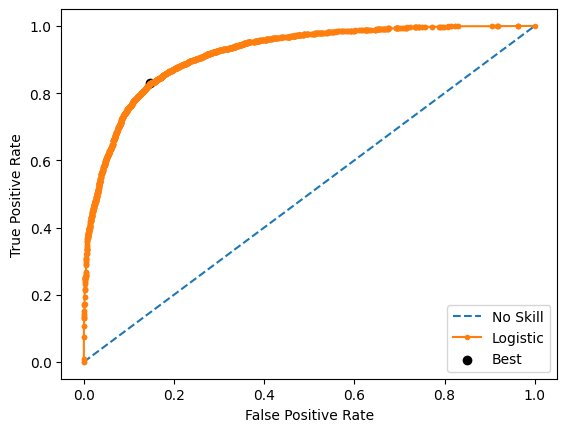

In [ ]:
# predict probabilities
yhat = model_v2_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_v2_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

50/50 [==============================] - 0s 832us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
## obtain the classification report Hint: use y_val
cr=metrics.classification_report(y_val,y_pred_e)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.84      0.88      1274
           1       0.53      0.67      0.59       326

    accuracy                           0.81      1600
   macro avg       0.72      0.76      0.73      1600
weighted avg       0.83      0.81      0.82      1600



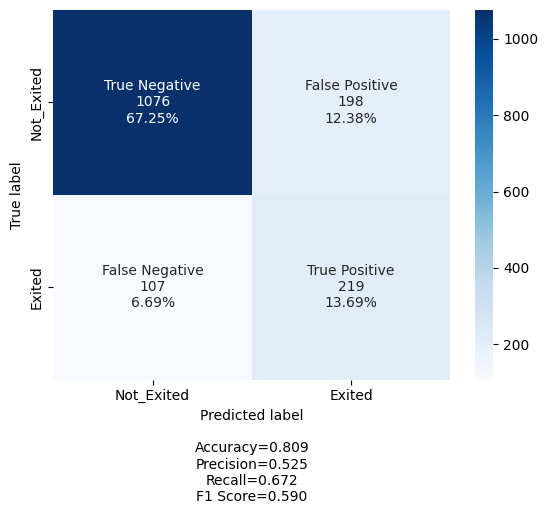

In [ ]:
## plot the confusion matrix with y_val and y-pred_e

cm1=confusion_matrix(y_val, y_pred_e)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#build model3
def create_model_v3(layer_1=32, layer_2=16, layer_3=8, dropout_1=0.2, dropout_2=0.01):
  #Initializing the neural network
  model = Sequential()

  #Adding the input layer with 32 neurons and relu as activation function
  model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

  # add dropout with dropout_rate= 0.2
  model.add(Dropout(dropout_1))

  # Adding the first hidden layer with 16 neurons with relu as activation functions
  model.add(Dense(layer_2,activation='relu'))

  # add dropout with dropout_rate= 0.1
  model.add(Dropout(dropout_2))
  # Adding the second hidden layer with 8 neurons with relu as activation functions
  model.add(Dense(layer_3,activation='relu'))

  # Adding the output layer
  model.add(Dense(1, activation = 'sigmoid'))

  # Initialize the ANN with Adam optimizer
  optimizer = tf.keras.optimizers.Adam(0.001)

  # compile the model with binary cross entropy as loss function and accuracy as metrics
  model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
  return model

In [ ]:
model_3 = create_model_v3()

test


In [ ]:
# Summary of the model
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

Epoch 1/100
319/319 [==============================] - 1s 2ms/step - loss: 0.6080 - accuracy: 0.6733 - val_loss: 0.5318 - val_accuracy: 0.7494
Epoch 2/100
319/319 [==============================] - 0s 2ms/step - loss: 0.5491 - accuracy: 0.7246 - val_loss: 0.5175 - val_accuracy: 0.7425
Epoch 3/100
319/319 [==============================] - 0s 2ms/step - loss: 0.5362 - accuracy: 0.7361 - val_loss: 0.5374 - val_accuracy: 0.7387
Epoch 4/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5185 - accuracy: 0.7455 - val_loss: 0.4970 - val_accuracy: 0.7606
Epoch 5/100
319/319 [==============================] - 1s 2ms/step - loss: 0.5064 - accuracy: 0.7581 - val_loss: 0.4733 - val_accuracy: 0.7869
Epoch 6/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.7599 - val_loss: 0.5113 - val_accuracy: 0.7619
Epoch 7/100
319/319 [==============================] - 1s 2ms/step - loss: 0.4801 - accuracy: 0.7747 - val_loss: 0.4745 - val_accuracy: 0.7869

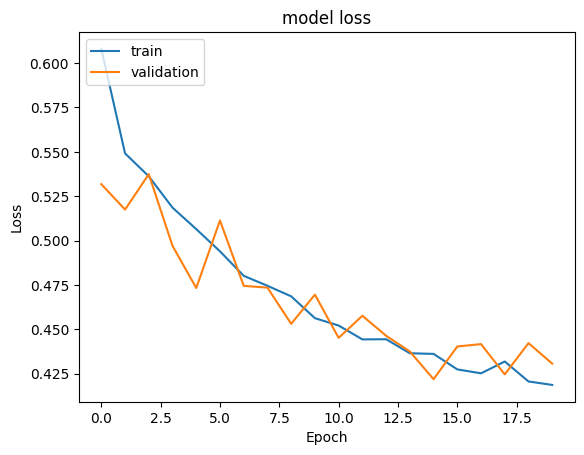

In [ ]:
# plot the Train Loss and Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

319/319 [==============================] - 0s 884us/step
Best Threshold=0.472553, G-Mean=0.823


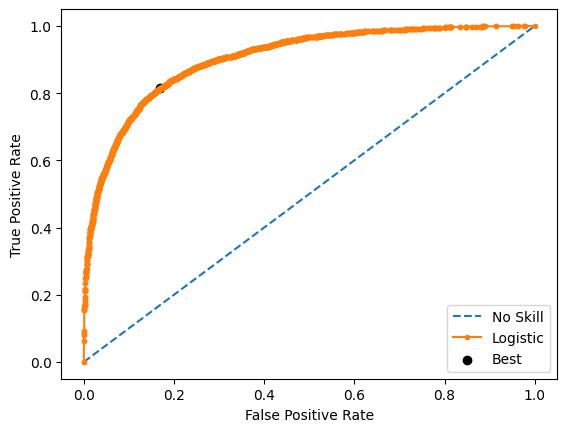

In [ ]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

50/50 [==============================] - 0s 940us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
# obtain the classification report
cr=metrics.classification_report(y_val,y_pred_3)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1274
           1       0.51      0.69      0.59       326

    accuracy                           0.80      1600
   macro avg       0.71      0.76      0.73      1600
weighted avg       0.83      0.80      0.81      1600



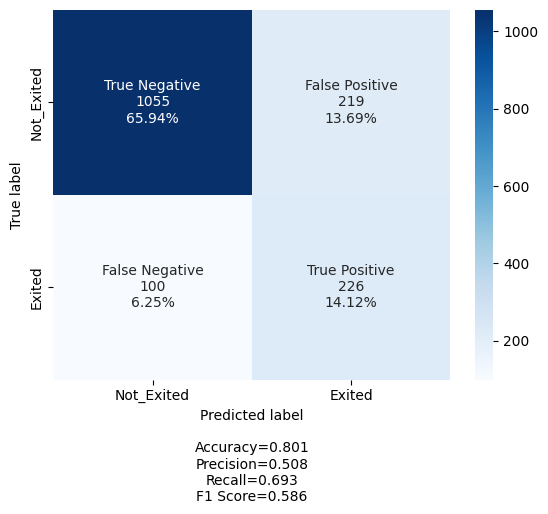

In [ ]:
# obtain the confusion matrix

cm1=confusion_matrix(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ##  adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim.
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim.
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

In [ ]:
## calling the creat_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=create_model_v4  , verbose=1, lr=0.01)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# use the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
## fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(X_train, y_train,validation_data = (X_val,y_val),verbose=1)

# Summarize resultsh
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
160/160 [==============================] - 1s 3ms/step - loss: 0.5617 - accuracy: 0.7190 - val_loss: 0.5483 - val_accuracy: 0.7425
Best: 0.742152 using {'batch_size': 64, 'lr': 0.01}


In [ ]:
# Creating the model
estimator_v4=create_model_v4(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## Complete the code to fit the model on train data abd train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v4.fit(X_train, y_train, epochs=100, batch_size = grid_result.best_params_['batch_size'], verbose=1,validation_data=(X_val,y_val))

Epoch 1/100
160/160 [==============================] - 1s 2ms/step - loss: 0.5604 - accuracy: 0.7216 - val_loss: 0.5282 - val_accuracy: 0.7638
Epoch 2/100
160/160 [==============================] - 0s 2ms/step - loss: 0.5152 - accuracy: 0.7548 - val_loss: 0.5099 - val_accuracy: 0.7425
Epoch 3/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7654 - val_loss: 0.5074 - val_accuracy: 0.7744
Epoch 4/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.7750 - val_loss: 0.4587 - val_accuracy: 0.7831
Epoch 5/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4679 - accuracy: 0.7787 - val_loss: 0.4430 - val_accuracy: 0.7962
Epoch 6/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4569 - accuracy: 0.7913 - val_loss: 0.5107 - val_accuracy: 0.7669
Epoch 7/100
160/160 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7930 - val_loss: 0.4771 - val_accuracy: 0.7875

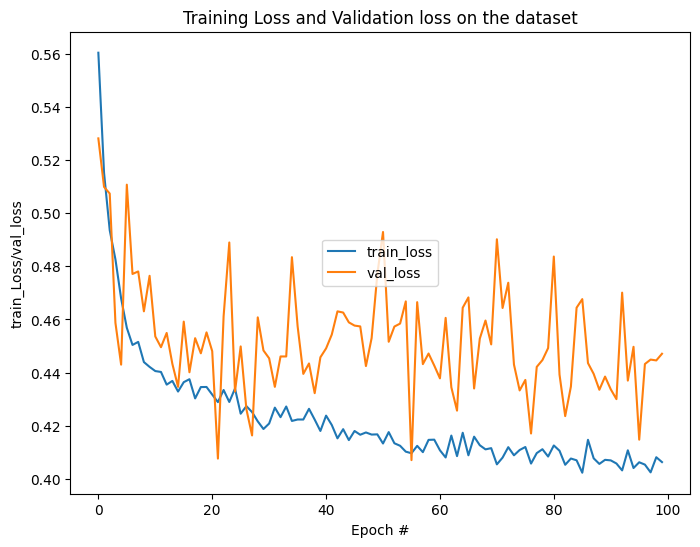

In [ ]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

319/319 [==============================] - 0s 886us/step
Best Threshold=0.511084, G-Mean=0.833


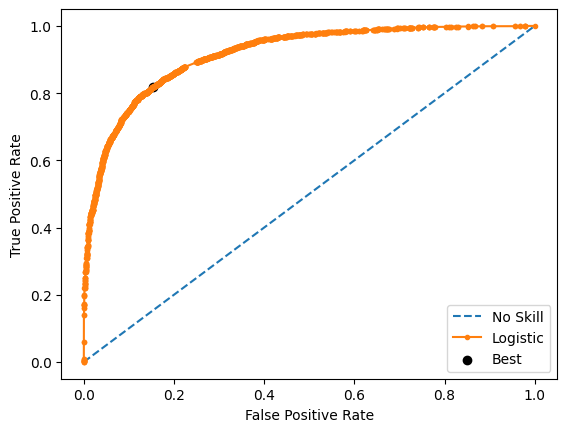

In [ ]:
# predict probabilities
yhat = estimator_v4.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# obtain the predictions on X_val
y_pred_h = estimator_v4.predict(X_val)
print(y_pred_h)

50/50 [==============================] - 0s 981us/step
[[0.17433374]
 [0.00776718]
 [0.08736538]
 ...
 [0.36075667]
 [0.8023409 ]
 [0.706246  ]]


In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false.
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

[[False]
 [False]
 [False]
 ...
 [False]
 [ True]
 [ True]]


In [ ]:
#  obtain the classification report
cr=metrics.classification_report(y_val,y_pred_h)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1274
           1       0.51      0.69      0.59       326

    accuracy                           0.80      1600
   macro avg       0.71      0.76      0.73      1600
weighted avg       0.83      0.80      0.81      1600



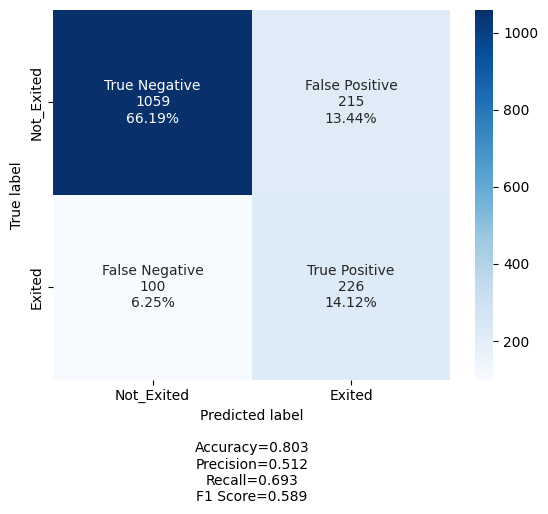

In [ ]:
## obtain the confusion matrix
cm_h=confusion_matrix(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

### Model Improvement: Neural Network model with balanced data

In [ ]:
## apply SMOTE on train data
sm  = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192, 1) 



<Axes: ylabel='count'>

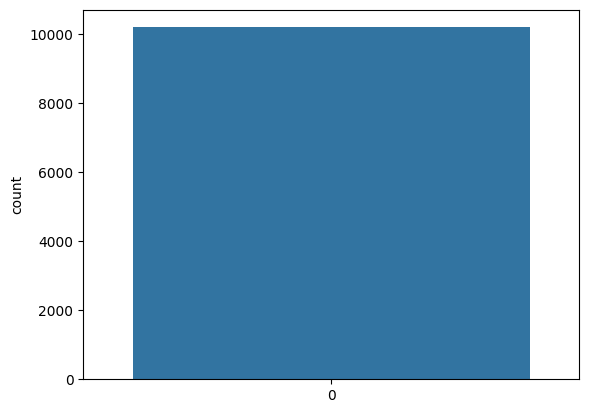

In [ ]:
sns.countplot(y_train['Exited'])

In [ ]:
#clear env
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# create model
def create_model_v5():
  model = Sequential()

  #add input layer of 32 neurons and relu as activation
  model.add(Dense(32, activation='relu', input_dim= X_train.shape[1]))

  #add dropout rate of 0.2
  model.add(Dropout(0.2))

  #add hidden layer with 16 neurons wih relu as activation
  model.add(Dense(16, activation='relu'))

  #add dropout rate of 0.1
  model.add(Dropout(0.1))

  #add dense layer with 8
  model.add(Dense(8, activation='relu'))

  #add final layer
  model.add(Dense(1, activation='sigmoid'))

  #init Adam optimizer
  optimizer = tf.keras.optimizers.Adam(0.001)

  #compile model with crossentropy
  model.compile(optimizer= optimizer, loss= 'binary_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
# create model and get summary
model_v5 = create_model_v5()
model_v5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.1

In [ ]:
#earlystopping callback
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

#  fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_4 = model_v5.fit(X_train,y_train,batch_size=64,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[es_cb])

Epoch 1/100
160/160 [==============================] - 2s 3ms/step - loss: 0.6712 - accuracy: 0.5881 - val_loss: 0.6949 - val_accuracy: 0.6725
Epoch 2/100
160/160 [==============================] - 1s 3ms/step - loss: 0.6242 - accuracy: 0.6990 - val_loss: 0.6689 - val_accuracy: 0.7281
Epoch 3/100
160/160 [==============================] - 1s 4ms/step - loss: 0.6004 - accuracy: 0.7230 - val_loss: 0.6443 - val_accuracy: 0.7356
Epoch 4/100
160/160 [==============================] - 1s 4ms/step - loss: 0.5795 - accuracy: 0.7291 - val_loss: 0.6260 - val_accuracy: 0.7462
Epoch 5/100
160/160 [==============================] - 2s 13ms/step - loss: 0.5612 - accuracy: 0.7382 - val_loss: 0.5976 - val_accuracy: 0.7631
Epoch 6/100
160/160 [==============================] - 1s 7ms/step - loss: 0.5447 - accuracy: 0.7503 - val_loss: 0.5901 - val_accuracy: 0.7531
Epoch 7/100
160/160 [==============================] - 0s 3ms/step - loss: 0.5337 - accuracy: 0.7557 - val_loss: 0.5602 - val_accuracy: 0.770

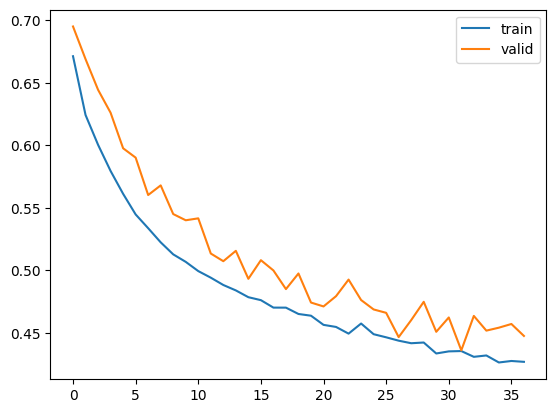

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

319/319 [==============================] - 1s 1ms/step
Best Threshold=0.472441, G-Mean=0.830


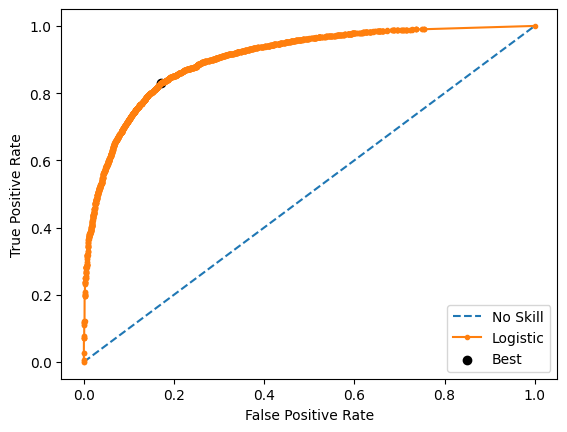

In [ ]:
##  find the optimal threshold using X_train
yhat = model_v5.predict(X_train)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# obtain the predictions on X_val
y_pred_s = model_v5.predict(X_val)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

50/50 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
#print classification report
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1274
           1       0.49      0.72      0.58       326

    accuracy                           0.79      1600
   macro avg       0.70      0.76      0.72      1600
weighted avg       0.83      0.79      0.80      1600



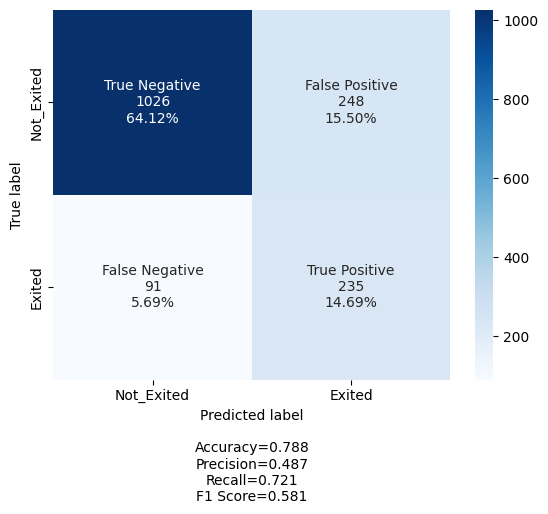

In [ ]:
#Calculating the confusion matrix
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Final Model


The best model would be the one that maximizes the recall, effectively minimizing false negatives.

*   model_v1 has a Recall of 0.681 and 104 False Negatives
*   model_v2 has a Recall of 0.672 and 107 False Negatives
*   model_v3 has a Recall of 0.693 and 100 False Negatives
*   model_v4 has a Recall of 0.693 and 100 False Negatives
*   model_v5 has a Recall of 0.721 and 91 False Negatives

Therefore, model_v5, Neural Network with Balanced Data by applying SMOTE, is the best model.



319/319 [==============================] - 1s 3ms/step
Best Threshold=0.472441, G-Mean=0.830


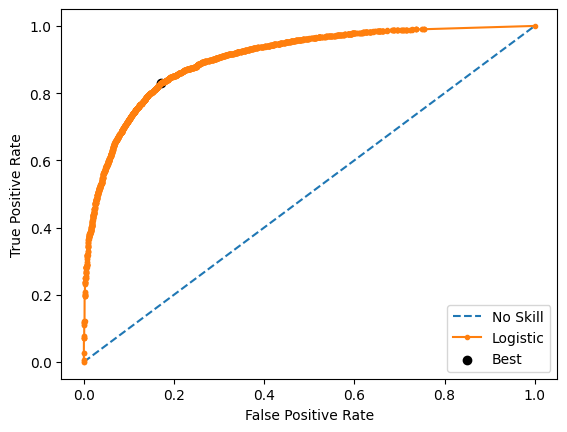

In [ ]:
# predict probabilities using the best model
yhat = model_v5.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Predict the X_test data using the best model
y_pred_test = model_v5.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
##  obtain the classification report on y_test and the predicted values
cr=metrics.classification_report(y_test,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.83      0.78      0.80      2000



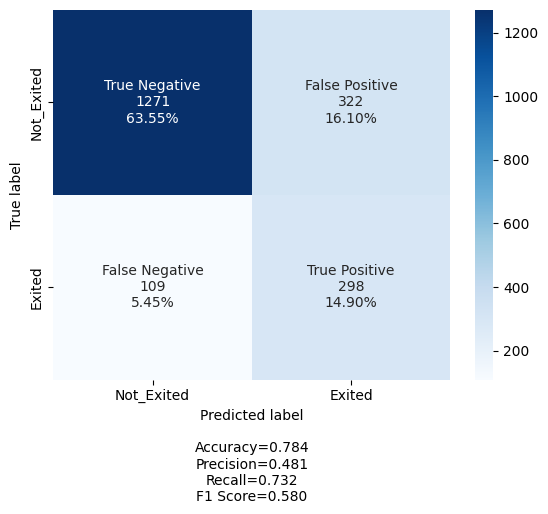

In [ ]:
# obtain the confusion matrix
cm_h=confusion_matrix(y_test, y_pred_test)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

## Actionable Insights and Recommendations

**What recommedations would you suggest to the bank?**



*   Some of the most common characteristics of customers who exit are Age, Balance, and IsActiveMember.
*   Customers who are older tend to exit more commonly, this could be caused by
increased experience and knowledge. One approach to promote customer retention is to give membership awards to those who hold accounts for long periods of times. Such as a 10 year membership bonus.
*   Customers who have higher balances tended to exit. This could be caused by customers feeling like they are not properly using the excess money. Higher Annual Percentage Yeilds (APY) could incentive high balance customers to keep money in the bank.
*   Understandably, non-active members tend to exit more often. Customers who are not active would not feel a need to utilize the bank. Encouraging customer activity should be a goal for the bank in terms of customer retention. Frequent events and promotions should be utilized.
*   Using a Neural Network with data that has been balanced by SMOTE technique yielded the highest recall score, thus effectively minimizing the False Negatives, which are most costly to the bank.







___

In [ ]:
%%shell
# jupyter nbconvert --to html ///INN_Learner_Notebook_Full_code_Daniel_Lien.ipynb
jupyter nbconvert INN_Learner_Notebook_Full_code_Daniel_Lien.ipynb --to html

[NbConvertApp] Converting notebook INN_Learner_Notebook_Full_code_Daniel_Lien.ipynb to html
[NbConvertApp] Writing 2306431 bytes to INN_Learner_Notebook_Full_code_Daniel_Lien.html
